In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
stations = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\Capital Bikeshare\saved_stations')
stations.drop(['lat_dms', 'lng_dms', 'Unnamed: 0'], axis=1, inplace=True)


In [3]:
high_usage_stations = stations[stations['daily_usage'] > 4.685]
st_coordinates = high_usage_stations[['start_lat', 'start_lng']]
added_ratio = high_usage_stations['%_bikes_added']
net_total = high_usage_stations['net_total']

coordinates_train, coordinates_test, added_ratio_train, added_ratio_test = train_test_split(st_coordinates,added_ratio,test_size=0.2, random_state=1)
co_train, co_test, net_total_train, net_total_test = train_test_split(st_coordinates,net_total,test_size=0.2, random_state=1)

In [25]:
def model_accuracy_comparison_and_big_plot(X_train, y_train, X_test, y_test):
    # Create a dictionary of regression models
    reg_models = {
        'Random Forest': RandomForestRegressor(),
        'Random Forest tuned': RandomForestRegressor(bootstrap=True, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'GB tuned': GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=300),
        'GB tuned net': GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200)
    }

    for name, model in reg_models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)

        # Print the metrics
        print(f"{name}:")
        print(f" Mean Absolute Error: {mae:.2f}")
        print(f" Mean Squared Error: {mse:.2f}")
        print(f" Root Mean Squared Error: {rmse:.2f}")
        print(f" R-squared: {r2:.2f}\n")
        
        # Plotting the results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.plot(y_test, y_test, color='red')  # Line for perfect predictions
        plt.title(f'{name} Predictions vs Actual')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

Decision Tree:
 Mean Absolute Error: 2.35
 Mean Squared Error: 12.72
 Root Mean Squared Error: 3.57
 R-squared: -0.13



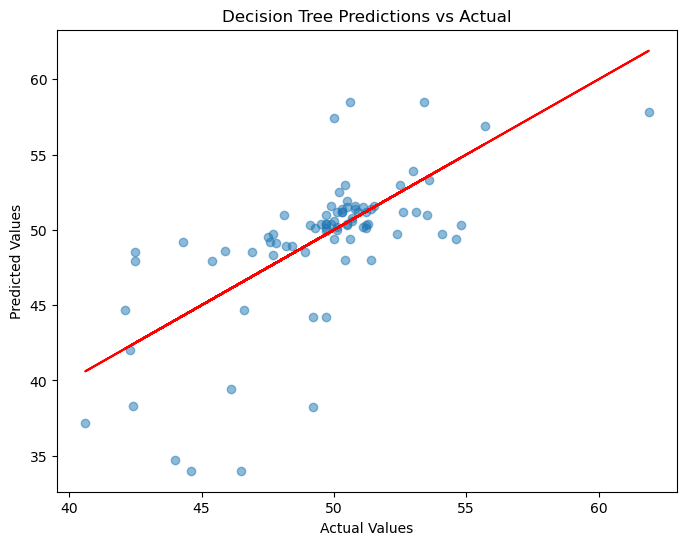

Random Forest:
 Mean Absolute Error: 1.77
 Mean Squared Error: 5.60
 Root Mean Squared Error: 2.37
 R-squared: 0.50



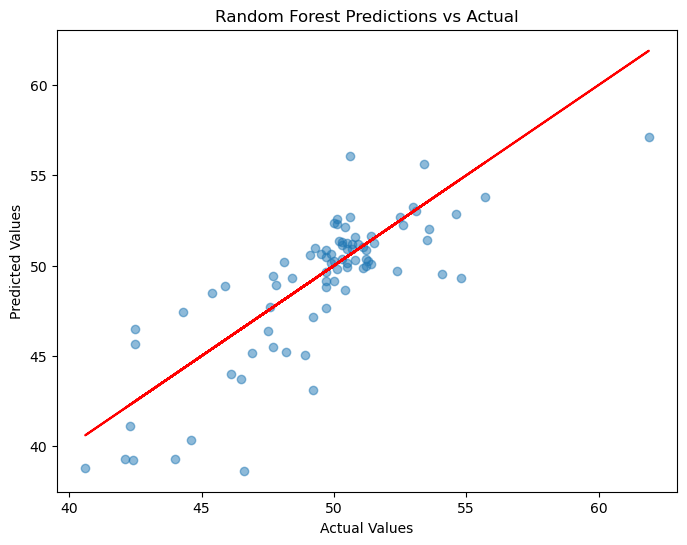

Gradient Boosting Regressor:
 Mean Absolute Error: 1.91
 Mean Squared Error: 6.95
 Root Mean Squared Error: 2.64
 R-squared: 0.38



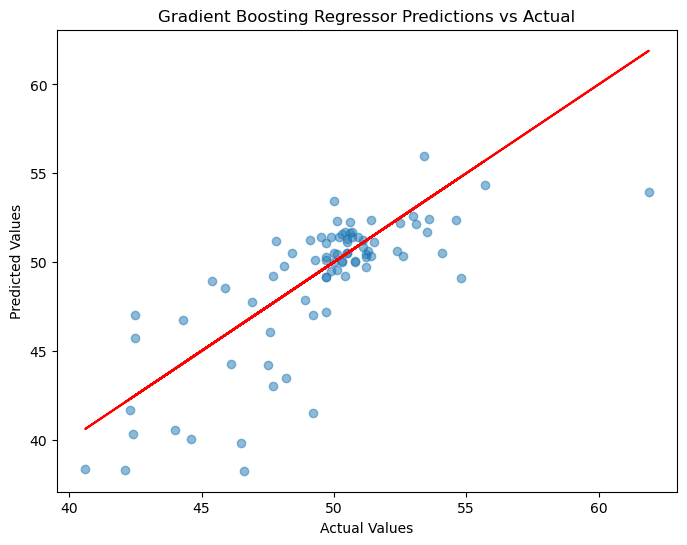

GB tuned:
 Mean Absolute Error: 1.77
 Mean Squared Error: 6.05
 Root Mean Squared Error: 2.46
 R-squared: 0.46



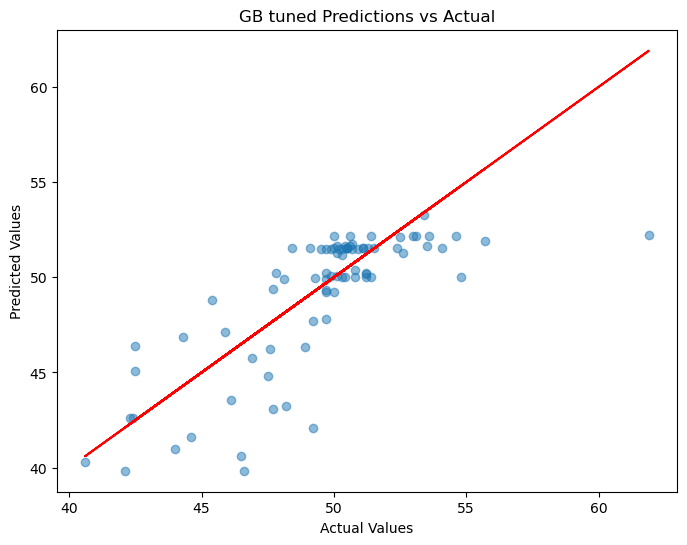

GB tuned net:
 Mean Absolute Error: 1.72
 Mean Squared Error: 5.71
 Root Mean Squared Error: 2.39
 R-squared: 0.49



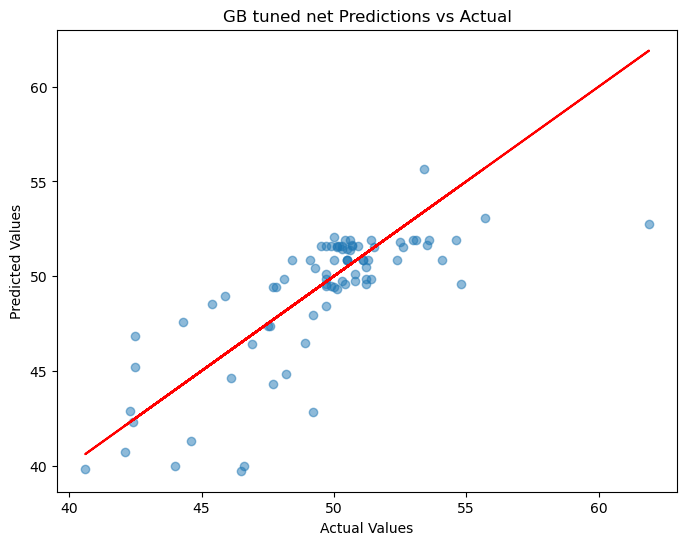

In [5]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Decision Tree:
 Mean Absolute Error: 2.44
 Mean Squared Error: 13.39
 Root Mean Squared Error: 3.66
 R-squared: -0.19



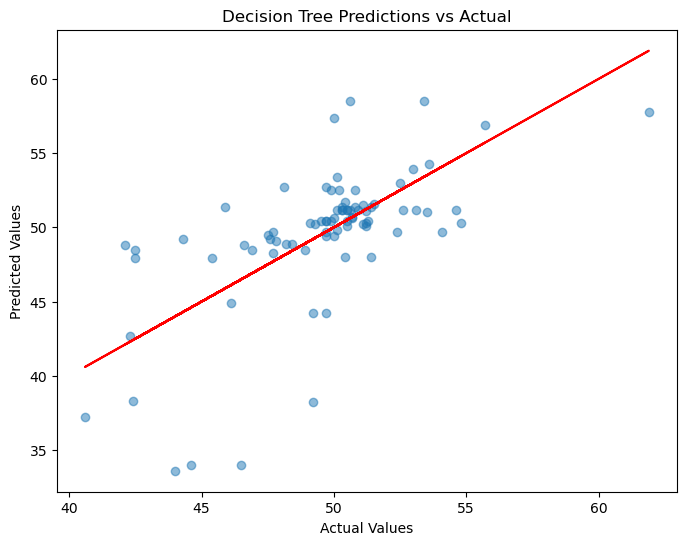

Random Forest:
 Mean Absolute Error: 1.73
 Mean Squared Error: 5.43
 Root Mean Squared Error: 2.33
 R-squared: 0.52



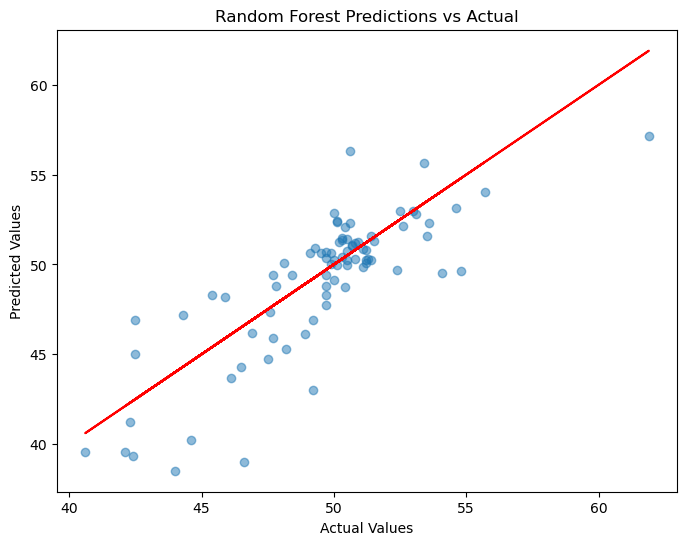

Gradient Boosting Regressor:
 Mean Absolute Error: 1.91
 Mean Squared Error: 6.96
 Root Mean Squared Error: 2.64
 R-squared: 0.38



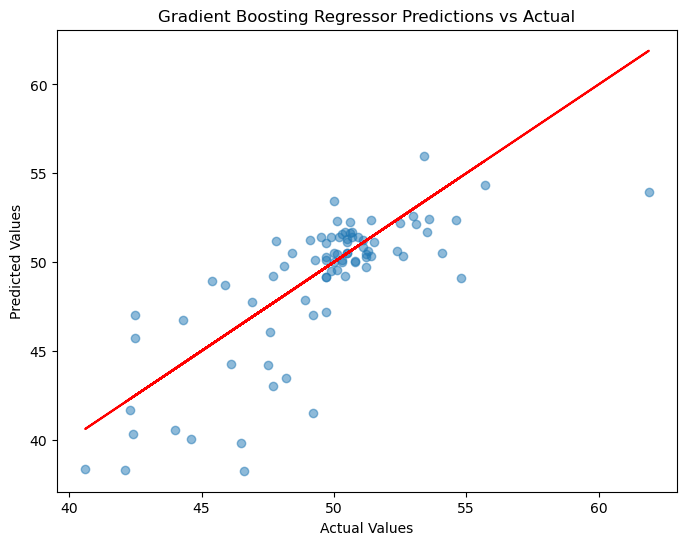

GB tuned:
 Mean Absolute Error: 1.77
 Mean Squared Error: 6.05
 Root Mean Squared Error: 2.46
 R-squared: 0.46



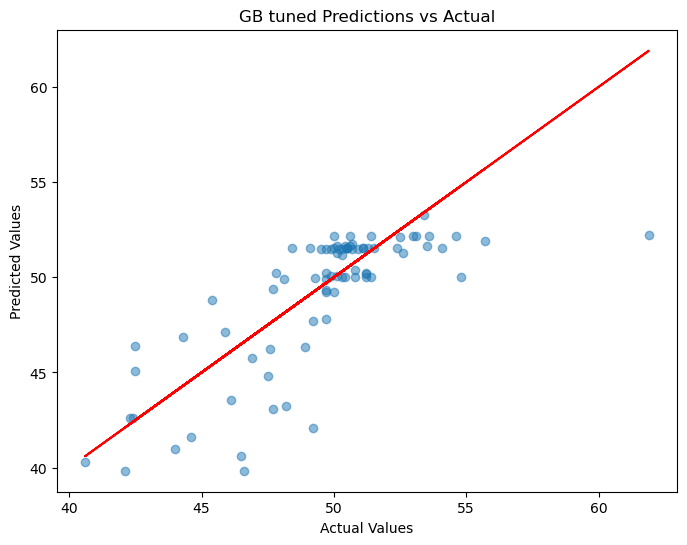

GB tuned net:
 Mean Absolute Error: 1.72
 Mean Squared Error: 5.68
 Root Mean Squared Error: 2.38
 R-squared: 0.49



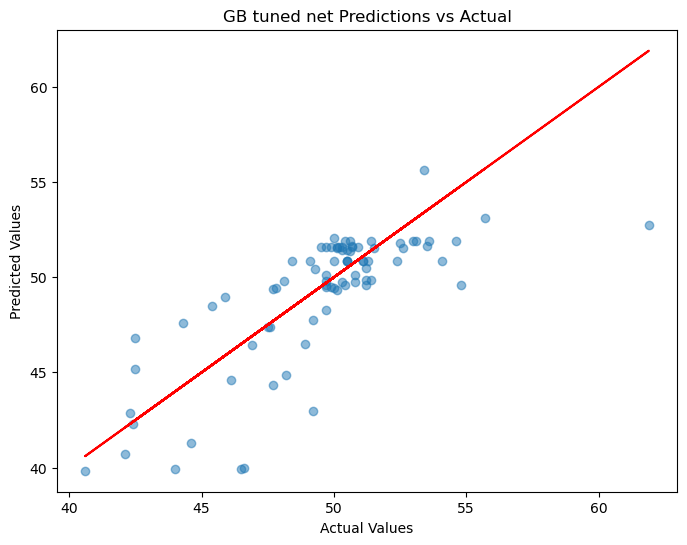

In [6]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Decision Tree:
 Mean Absolute Error: 742.24
 Mean Squared Error: 1656946.36
 Root Mean Squared Error: 1287.22
 R-squared: 0.36



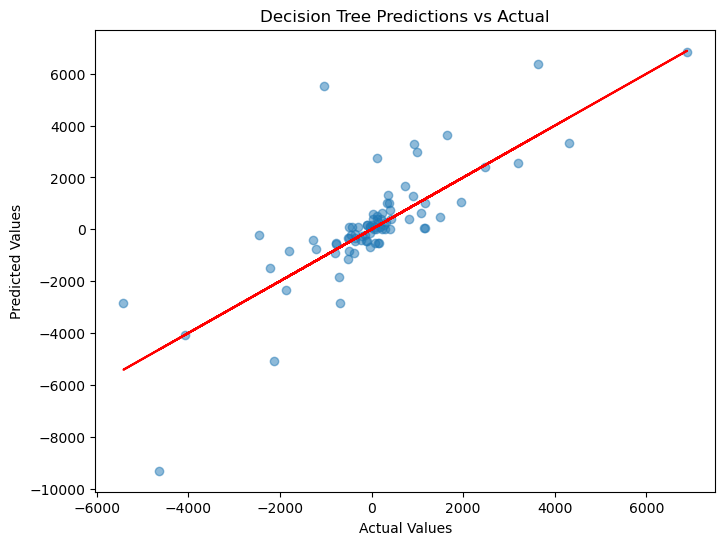

Random Forest:
 Mean Absolute Error: 717.63
 Mean Squared Error: 929183.12
 Root Mean Squared Error: 963.94
 R-squared: 0.64



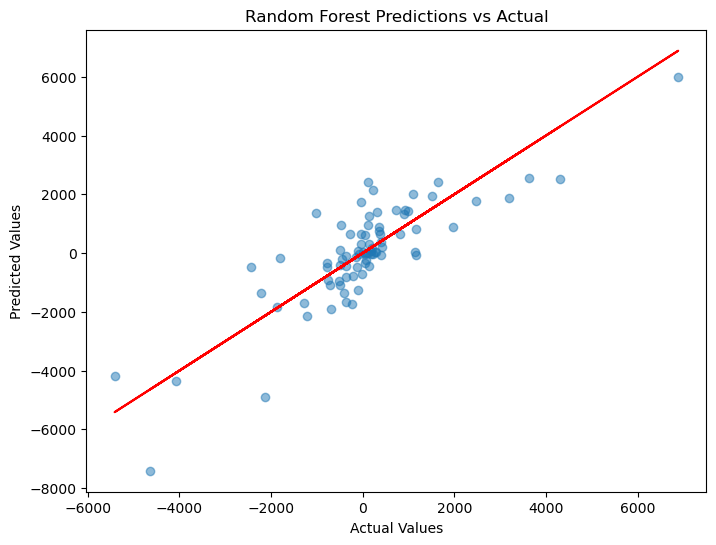

Gradient Boosting Regressor:
 Mean Absolute Error: 810.51
 Mean Squared Error: 1159917.64
 Root Mean Squared Error: 1076.99
 R-squared: 0.56



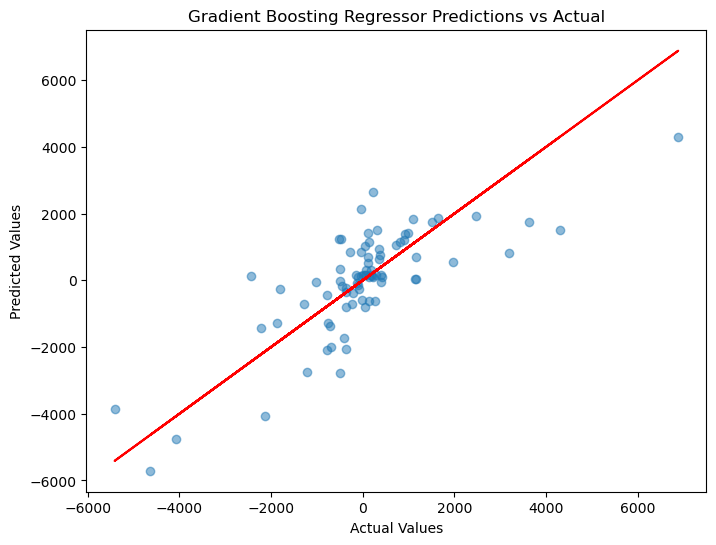

GB tuned:
 Mean Absolute Error: 776.17
 Mean Squared Error: 1163376.71
 Root Mean Squared Error: 1078.60
 R-squared: 0.55



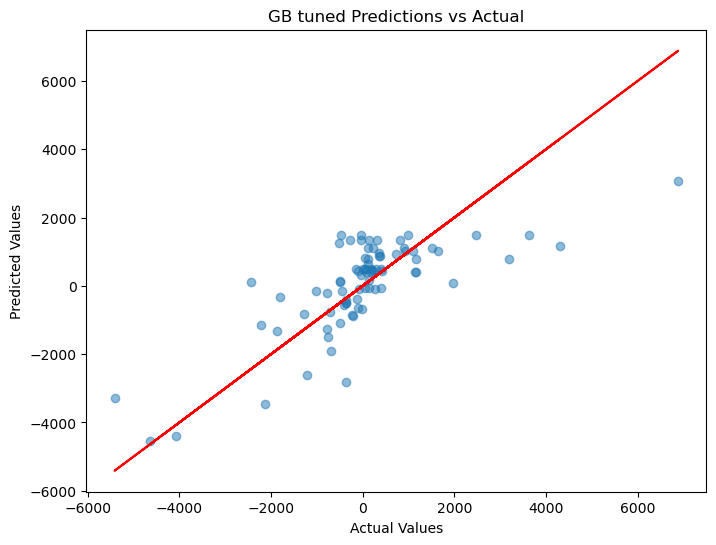

GB tuned net:
 Mean Absolute Error: 722.74
 Mean Squared Error: 981184.88
 Root Mean Squared Error: 990.55
 R-squared: 0.62



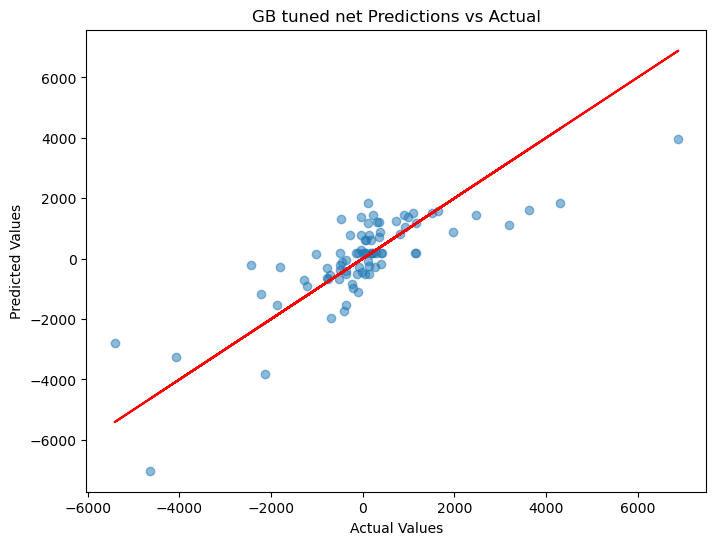

In [7]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

Decision Tree:
 Mean Absolute Error: 707.78
 Mean Squared Error: 1174669.49
 Root Mean Squared Error: 1083.82
 R-squared: 0.55



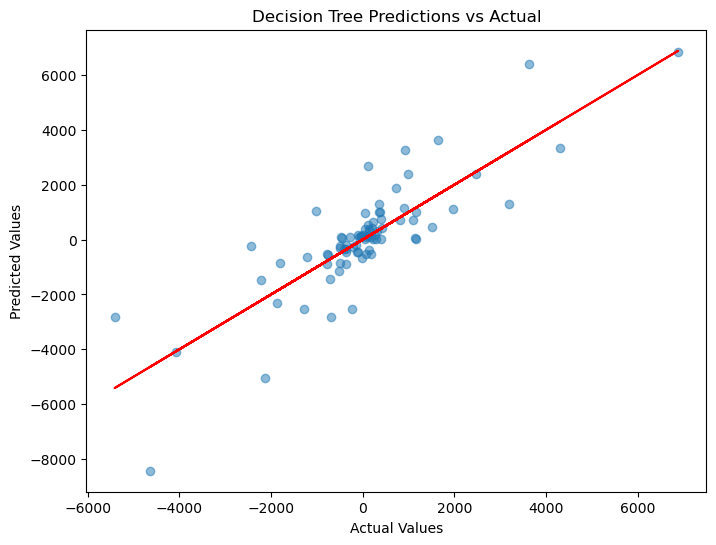

Random Forest:
 Mean Absolute Error: 709.04
 Mean Squared Error: 947507.53
 Root Mean Squared Error: 973.40
 R-squared: 0.64



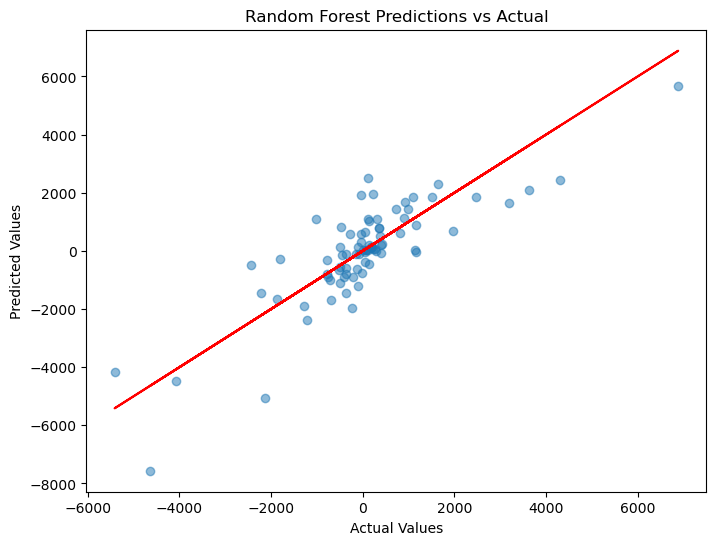

Gradient Boosting Regressor:
 Mean Absolute Error: 812.93
 Mean Squared Error: 1171749.97
 Root Mean Squared Error: 1082.47
 R-squared: 0.55



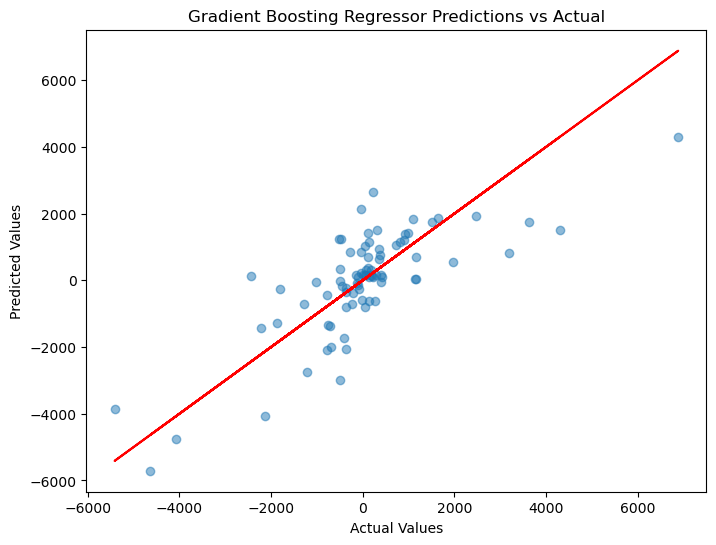

GB tuned:
 Mean Absolute Error: 776.23
 Mean Squared Error: 1163499.00
 Root Mean Squared Error: 1078.66
 R-squared: 0.55



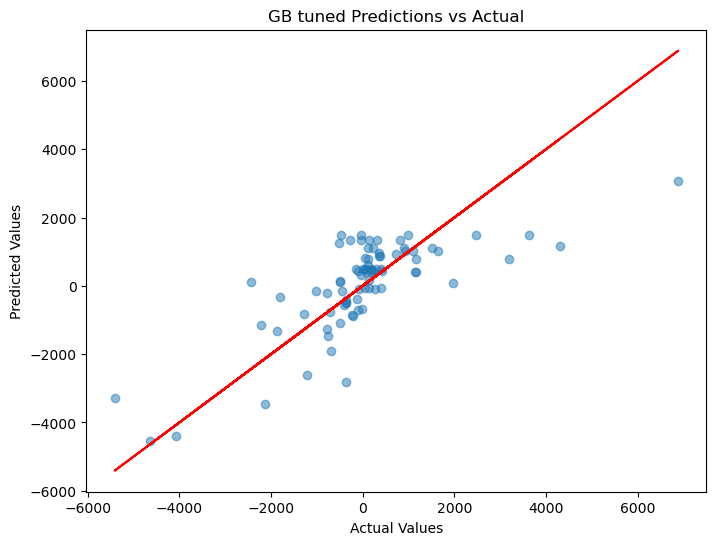

GB tuned net:
 Mean Absolute Error: 722.76
 Mean Squared Error: 980360.74
 Root Mean Squared Error: 990.13
 R-squared: 0.62



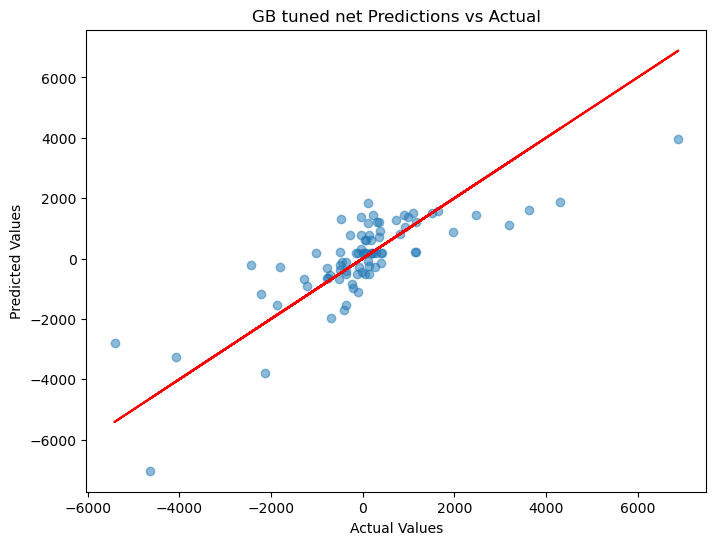

In [8]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

In [9]:
from sklearn.model_selection import GridSearchCV

# Example for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(coordinates_train, added_ratio_train)

# best_params_ gives the best parameters found by GridSearchCV
print(grid_search.best_params_)


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [10]:
from sklearn.model_selection import GridSearchCV

# Example for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(coordinates_train, net_total_train)

# best_params_ gives the best parameters found by GridSearchCV
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [20]:
def model_accuracy_comparison_and_plot(X_train, y_train, X_test, y_test):
    # Create a dictionary of regression models
    reg_models = {
        'Random Forest': RandomForestRegressor(),
        'Random Forest tuned': RandomForestRegressor(bootstrap=True, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'GB tuned': GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=300),
        'GB tuned net': GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200)
    }

    # Determine the layout of the subplots
    n_cols = 5
    n_rows = 1

    # Create a figure for the subplots
    plt.figure(figsize=(20, 4))  # Adjust the figure size as needed

    metrics_df = pd.DataFrame(columns=['Regression model', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared'])

    for i, (name, model) in enumerate(reg_models.items(), 1):
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions).round(2)
        mse = mean_squared_error(y_test, predictions).round(2)
        rmse = np.sqrt(mse).round(2)
        r2 = r2_score(y_test, predictions).round(2)

        # Print the metrics
        # print(f"{name}:")
        # print(f" Mean Absolute Error: {mae:.2f} / Mean Squared Error: {mse:.2f} / Root Mean Squared Error: {rmse:.2f} / R-squared: {r2:.2f}")
        
        # Plotting the results in a subplot
        plt.subplot(n_rows, n_cols, i)
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.plot(y_test, y_test, color='red')  # Line for perfect predictions
        plt.title(f'{name}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')

        metrics_row = {
            'Regression model': name,
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'R-squared': r2
        }

        metrics_df = pd.concat([metrics_df, pd.DataFrame([metrics_row])]).reset_index(drop=True)
        # metrics_df = metrics_df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

    # Show the plots
    plt.tight_layout()  # Adjust the spacing between plots
    plt.show()

    display(metrics_df)


Random State 1 Added Ratio

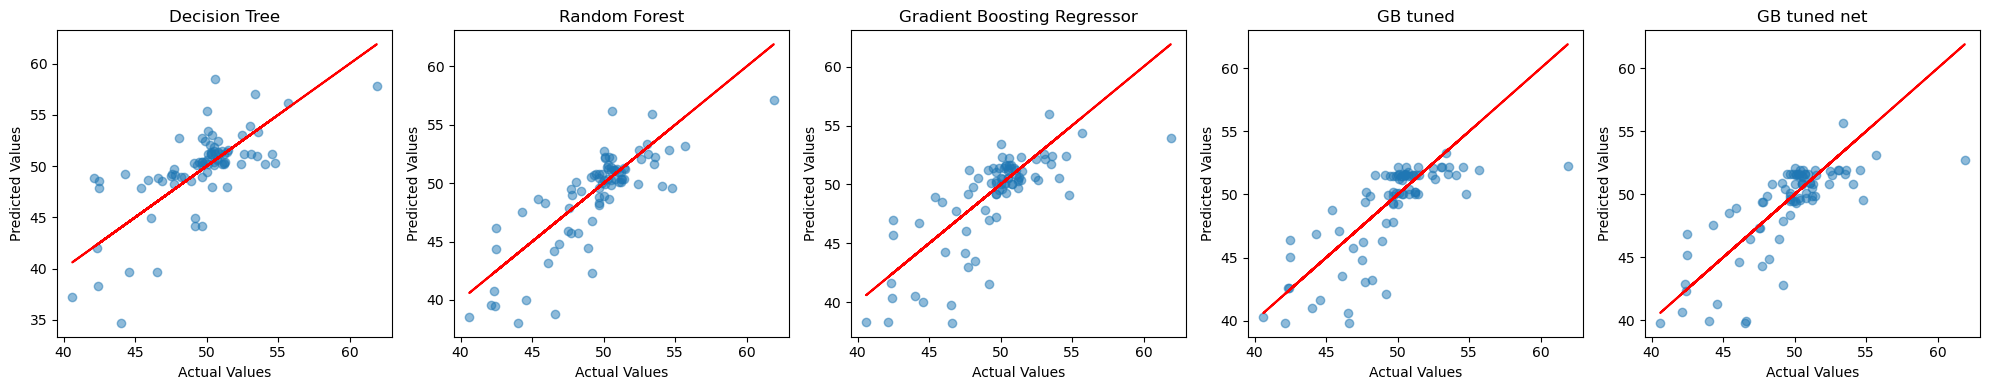

,Regression model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Decision Tree,2.12,8.65,2.94,0.23
1,Random Forest,1.79,5.78,2.40,0.48
2,Gradient Boosting Regressor,1.91,6.95,2.64,0.38
3,GB tuned,1.77,6.05,2.46,0.46
4,GB tuned net,1.72,5.70,2.39,0.49


In [12]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Random State 1 Net Total

We can talk about how the models have an easier time predicting negative values (more bikes taken) than positive ones (more bikes returned). This could be because the stations losing bikes are concentrated in specific areas of the map, with higher elevation, whereas the stations gaining bikes are spread around larger areas of the map. The total area of lower elevation is much larger than the area of higher elevation. 

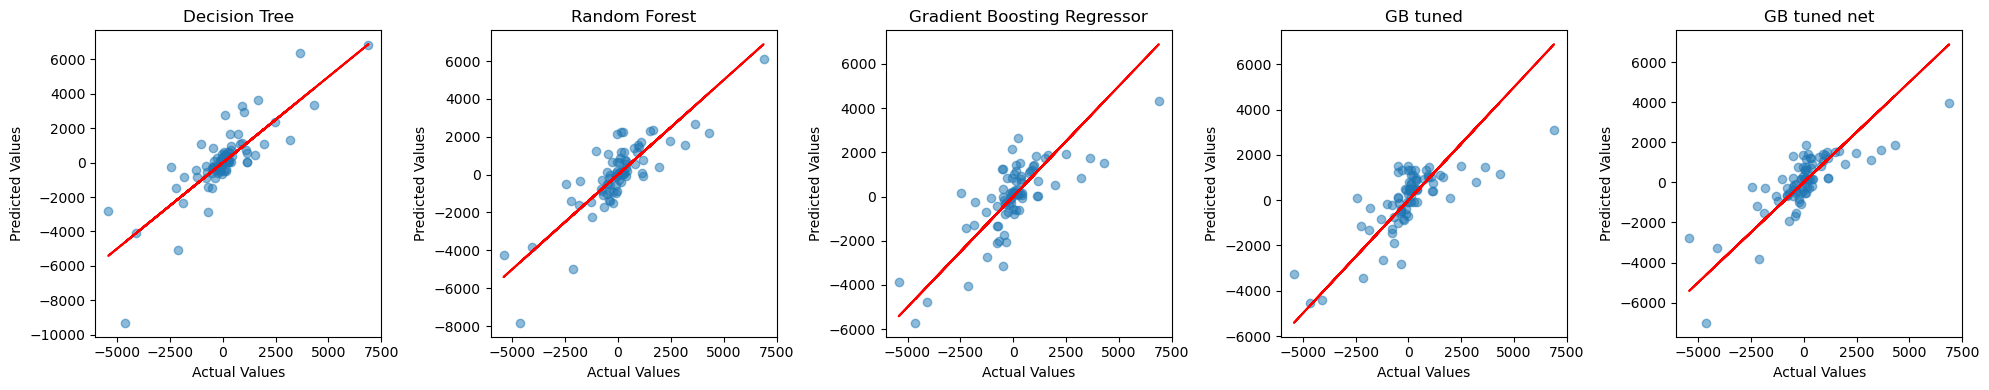

,Regression model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Decision Tree,725.32,1252542.22,1119.17,0.52
1,Random Forest,704.53,967313.99,983.52,0.63
2,Gradient Boosting Regressor,813.08,1181118.55,1086.79,0.55
3,GB tuned,774.56,1161707.35,1077.83,0.55
4,GB tuned net,721.34,977915.33,988.90,0.63


In [13]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

In [14]:
coordinates_train, coordinates_test, added_ratio_train, added_ratio_test = train_test_split(st_coordinates,added_ratio,test_size=0.2, random_state=9)
co_train, co_test, net_total_train, net_total_test = train_test_split(st_coordinates,net_total,test_size=0.2, random_state=9)

Random state 9 added ratio

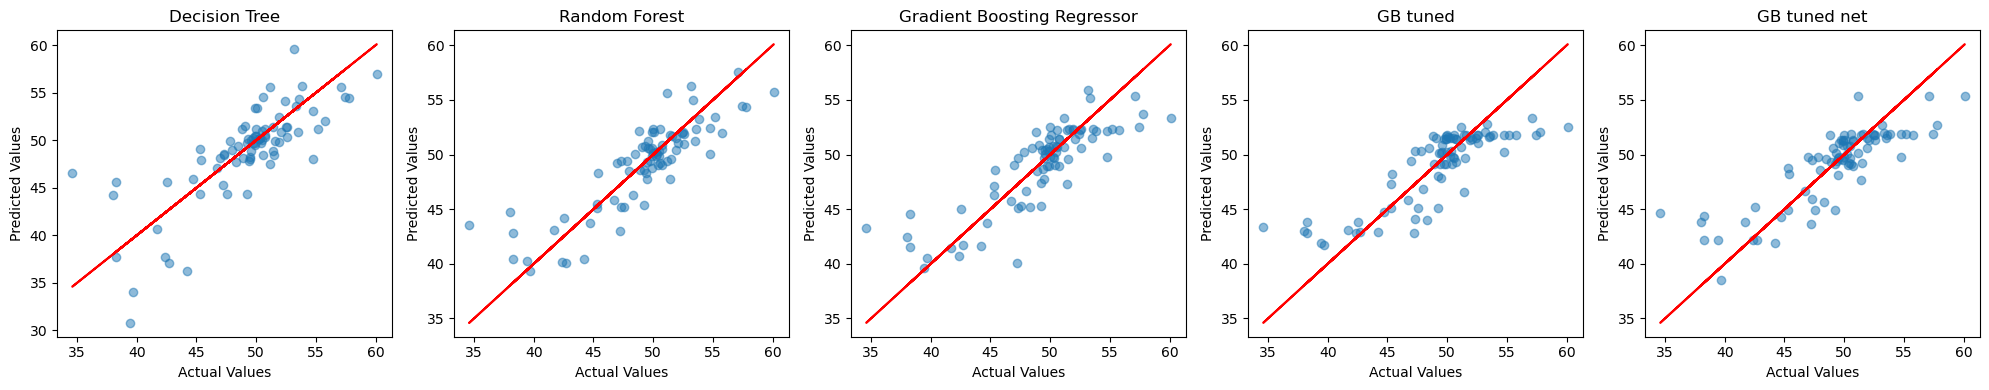

,Regression model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Decision Tree,2.27,10.26,3.20,0.52
1,Random Forest,1.76,5.57,2.36,0.74
2,Gradient Boosting Regressor,1.89,6.42,2.53,0.70
3,GB tuned,1.97,6.96,2.64,0.67
4,GB tuned net,1.87,6.56,2.56,0.69


In [16]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Random state 9 net total

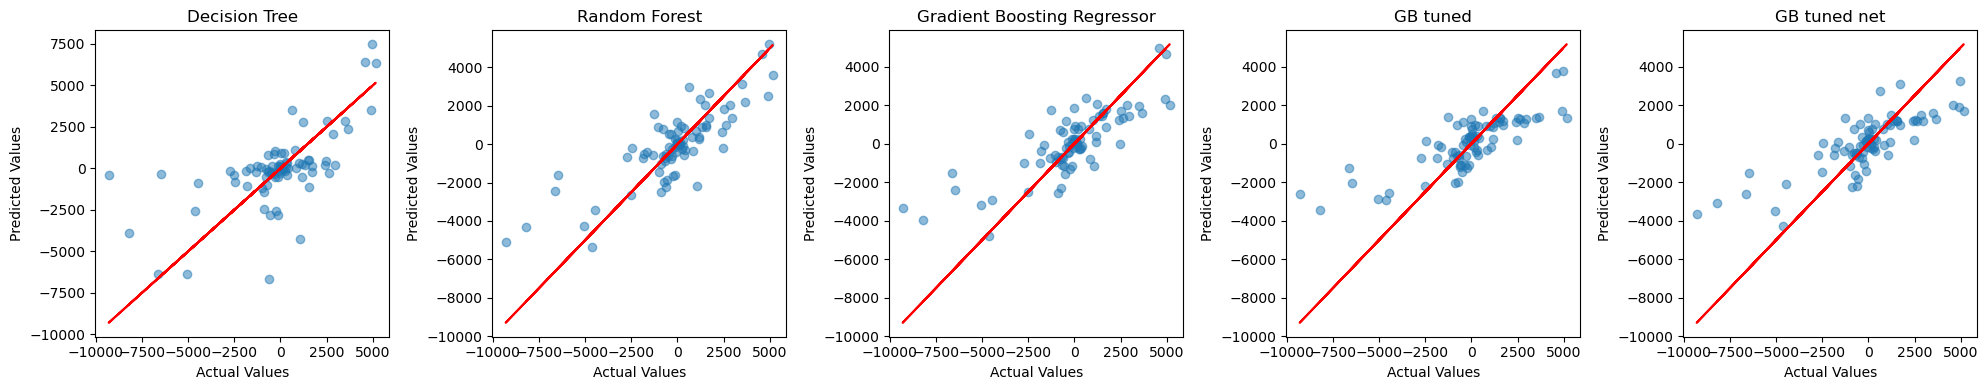

,Regression model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Decision Tree,1373.59,4236778.13,2058.34,0.35
1,Random Forest,1023.32,2138948.90,1462.51,0.67
2,Gradient Boosting Regressor,1044.08,2468455.52,1571.13,0.62
3,GB tuned,1140.49,2824439.07,1680.61,0.57
4,GB tuned net,1147.97,2701377.38,1643.59,0.58


In [17]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(coordinates_train, net_total_train)

# Best parameters found
print(grid_search.best_params_)


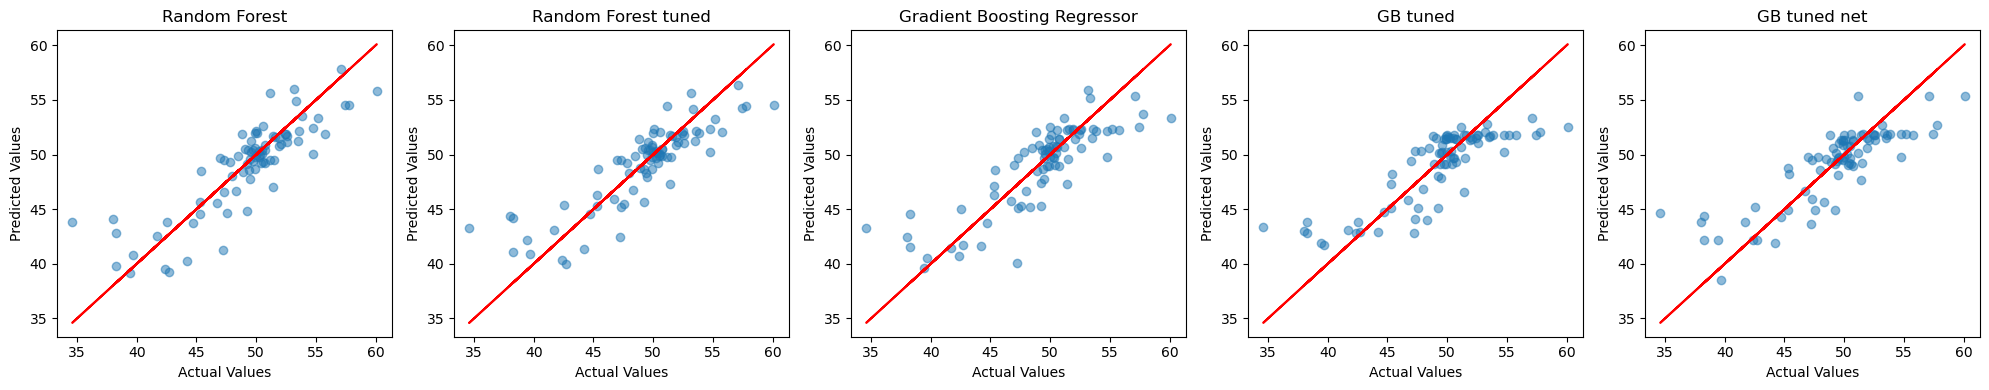

,Regression model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Random Forest,1.76,5.82,2.41,0.73
1,Random Forest tuned,1.75,5.60,2.37,0.74
2,Gradient Boosting Regressor,1.89,6.42,2.53,0.70
3,GB tuned,1.97,6.96,2.64,0.67
4,GB tuned net,1.87,6.56,2.56,0.69


In [21]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

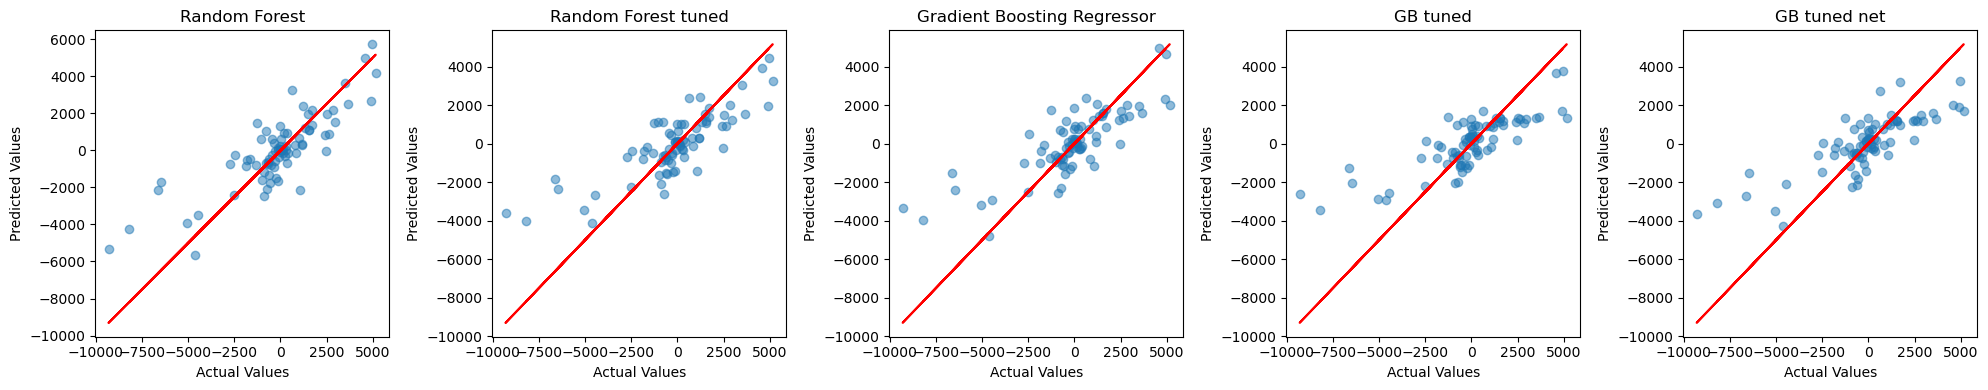

,Regression model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared
0,Random Forest,990.34,2050095.05,1431.82,0.69
1,Random Forest tuned,1051.68,2326198.23,1525.19,0.64
2,Gradient Boosting Regressor,1044.68,2468645.01,1571.19,0.62
3,GB tuned,1140.49,2824439.07,1680.61,0.57
4,GB tuned net,1147.32,2693484.19,1641.18,0.59


In [22]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

Random Forest:
 Mean Absolute Error: 1.83
 Mean Squared Error: 5.78
 Root Mean Squared Error: 2.40
 R-squared: 0.73



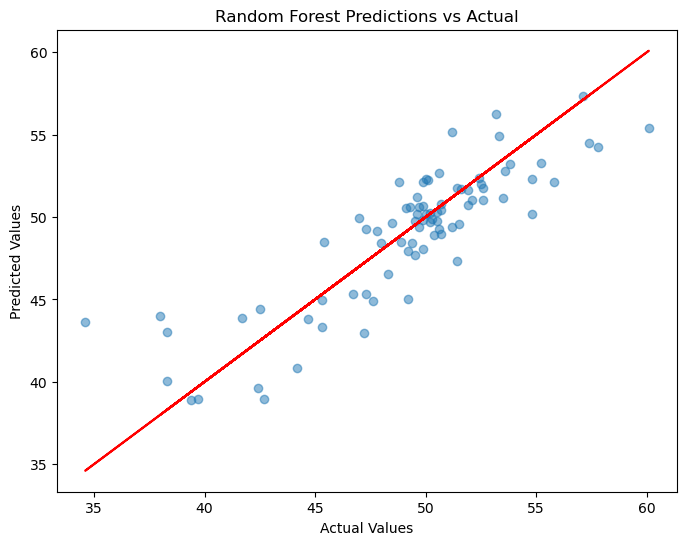

Random Forest tuned:
 Mean Absolute Error: 1.79
 Mean Squared Error: 5.87
 Root Mean Squared Error: 2.42
 R-squared: 0.72



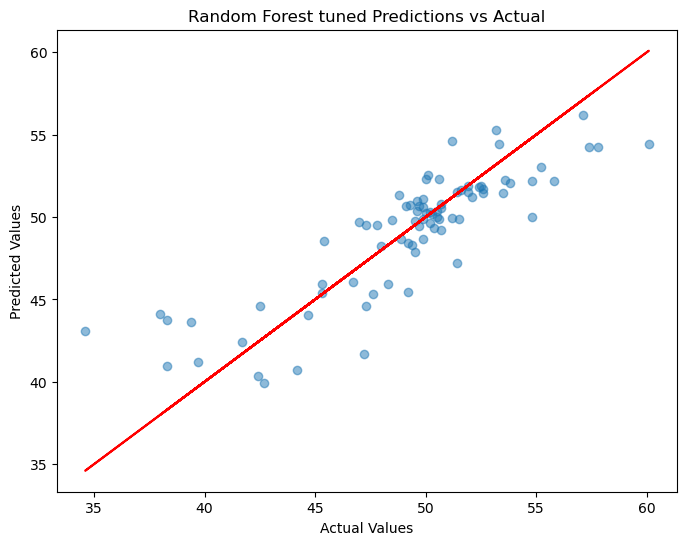

Gradient Boosting Regressor:
 Mean Absolute Error: 1.89
 Mean Squared Error: 6.44
 Root Mean Squared Error: 2.54
 R-squared: 0.70



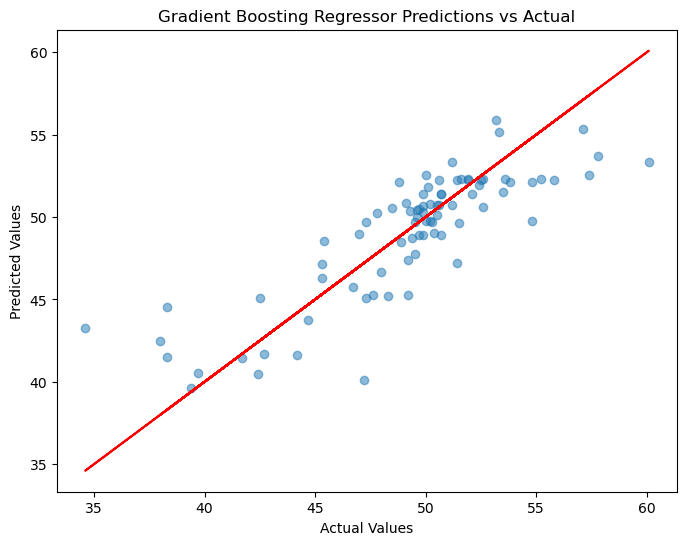

GB tuned:
 Mean Absolute Error: 1.97
 Mean Squared Error: 6.96
 Root Mean Squared Error: 2.64
 R-squared: 0.67



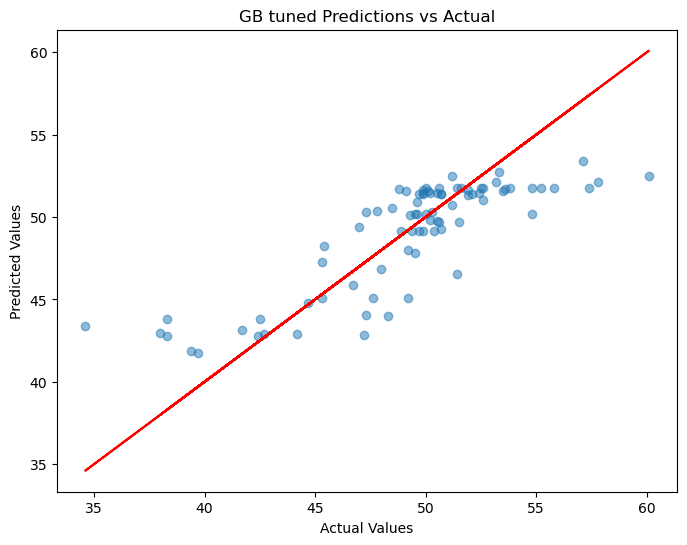

GB tuned net:
 Mean Absolute Error: 1.88
 Mean Squared Error: 6.57
 Root Mean Squared Error: 2.56
 R-squared: 0.69



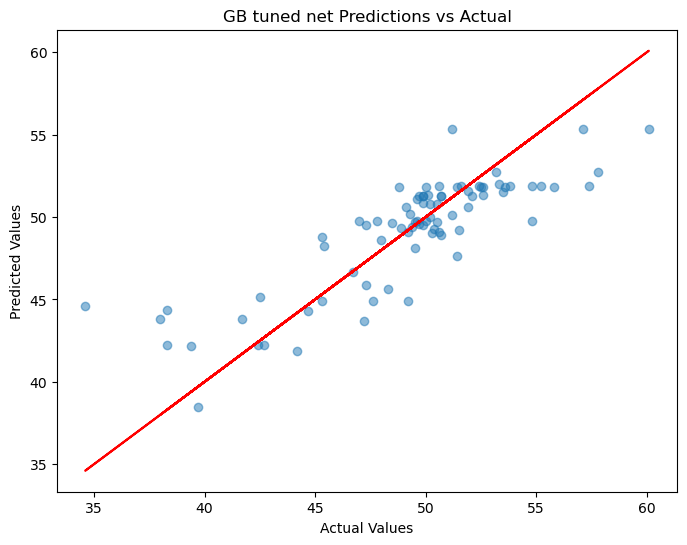

In [26]:
model_accuracy_comparison_and_big_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Random Forest:
 Mean Absolute Error: 1032.60
 Mean Squared Error: 2235619.65
 Root Mean Squared Error: 1495.20
 R-squared: 0.66



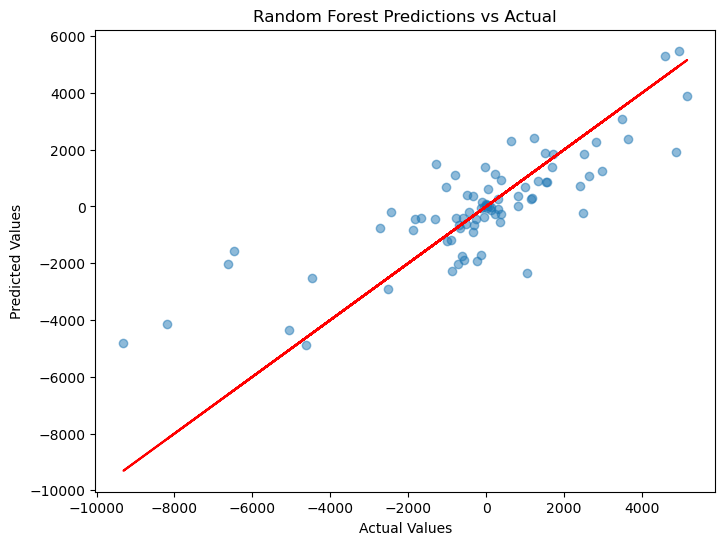

Random Forest tuned:
 Mean Absolute Error: 1028.03
 Mean Squared Error: 2271901.49
 Root Mean Squared Error: 1507.28
 R-squared: 0.65



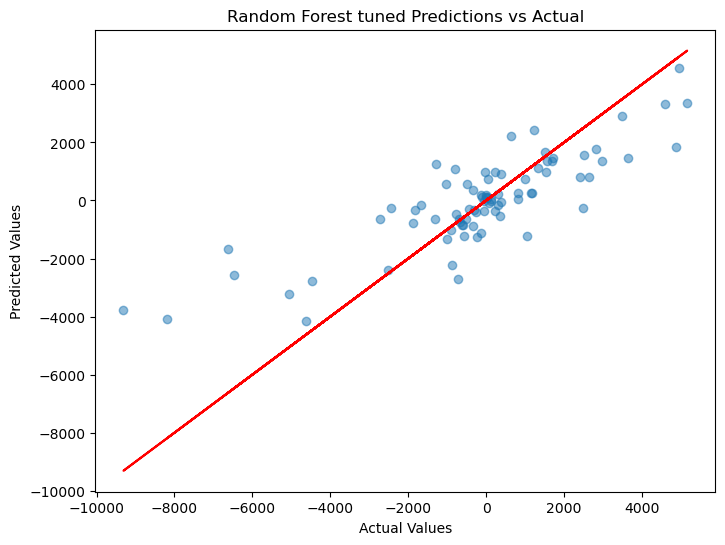

Gradient Boosting Regressor:
 Mean Absolute Error: 1044.08
 Mean Squared Error: 2468455.52
 Root Mean Squared Error: 1571.13
 R-squared: 0.62



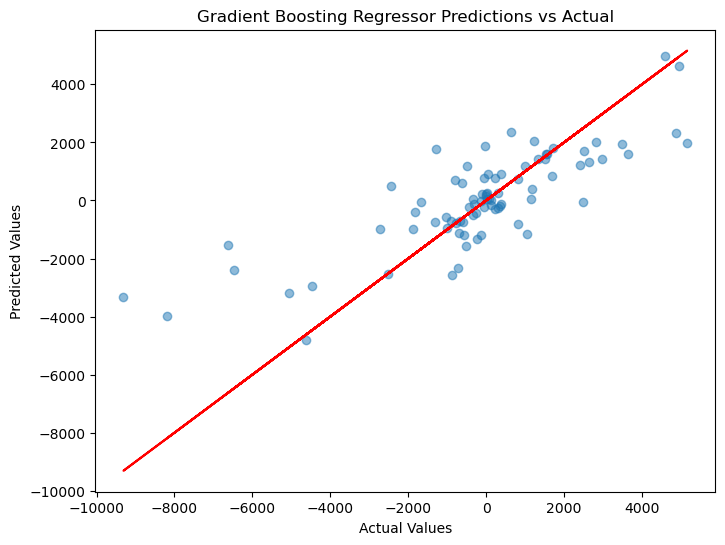

GB tuned:
 Mean Absolute Error: 1140.49
 Mean Squared Error: 2824439.07
 Root Mean Squared Error: 1680.61
 R-squared: 0.57



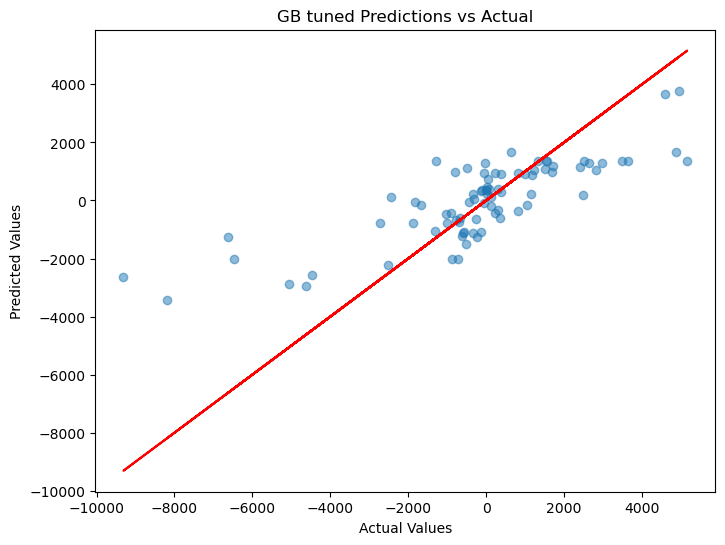

GB tuned net:
 Mean Absolute Error: 1147.30
 Mean Squared Error: 2698438.91
 Root Mean Squared Error: 1642.69
 R-squared: 0.59



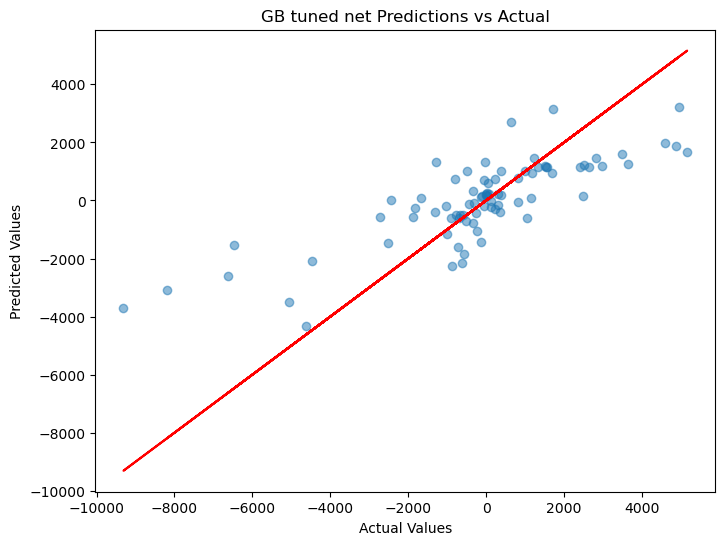

In [27]:
model_accuracy_comparison_and_big_plot(co_train, net_total_train, co_test, net_total_test)